### 512. Business Understanding
<h1>Tema central: Estratégias de fidelização de clientes para e-commerce</h1><h2>Contexto</h2><ul><li>E-commerce do Reino Unido</li><li>Contratou alunos da DNC</li><li>Para agrupar clientes com base em métricas RFM</li><li>Definir estratégias de fidelização</li></ul><h2>Métricas RFM</h2><ul><li>Recency (Recência)<ul><li>Tempo desde a última compra do cliente</li></ul></li><li>Frequency (Frequência)<ul><li>Número de vezes que o cliente comprou</li></ul></li><li>Monetary (Valor)<ul><li>Ticket médio ou valor total gasto pelo cliente</li></ul></li></ul><h2>Caso</h2><ul><li>Dados de dez/2010 a dez/2021 (1 ano)</li><li>Objetivo: Clusterizar clientes por RFM</li><li>Interpretar clusters e fornecer insights</li></ul><h2>Próximos passos</h2><ul><li>Entender melhor os dados (etapa Data Understanding)</li><li>Calcular métricas RFM</li><li>Clusterizar clientes</li><li>Interpretar clusters e fornecer insights</li></ul>

# Step 1: Business Understanding

Um e-commerce do Reino Unido contratou os alunos da DNC para agruparem seus clientes com base nas métricas RFM (discutidas abaixo), para então definir estratégias de fidelização. 

RFM:
- R (Recency): Tempo que o cliente realizou a última compra (em dias)
- F (Frequency): Quantidade de compras realizadas pelo cliente
- M (Monetary): Valor do **ticket médio** gasto pelo cliente


O conjunto de dados fornecido contém transações ocorridas entre dezembro de 2010 e dezembro de 2011.

Seu objetivo é clusterizar os clientes com base em suas métricas de RFM.

Fonte do dataset [neste link](https://www.kaggle.com/datasets/carrie1/ecommerce-data).

### 513. Data Understanding
<h1>Análise de Dados de Vendas</h1><h2>Etapa: Entendimento dos Dados (Data Understanding)</h2><ul><li>Carregamento de bibliotecas e funções</li><li>Fonte dos dados:<ul><li>Kaggle</li><li>Repositório UCI Machine Learning</li></ul></li><li>Estatísticas iniciais:<ul><li>541 mil observações</li><li>18 colunas</li></ul></li></ul><h3>Principais Colunas</h3><ul><li>invoice_no: número do pedido</li><li>stock_code: código do produto (descartável)</li><li>description: descrição do produto</li><li>quantity: quantidade vendida</li><li>invoice_date: data da venda</li><li>unit_price: preço unitário</li><li>customer_id: identificador do cliente</li><li>country: país</li></ul><h3>Tipos de Dados</h3><ul><li>Problems:<ul><li>invoice_no: deveria ser numérico</li><li>customer_id: deveria ser inteiro</li><li>invoice_date: deveria estar em formato datetime</li></ul></li></ul><h3>Análise Descritiva</h3><ul><li>4.223 produtos únicos (description)</li><li>38 países, mas 91,4% das observações são do Reino Unido</li><li>Quantidade e preço unitário possuem valores inválidos (menor que zero)</li></ul><h3>Próximos Passos</h3><ul><li>Tratamento dos dados (Data Preparation):<ul><li>Correção dos tipos de dados</li><li>Tratamento de valores inválidos</li><li>Criação de métricas RFM</li><li>Nova análise exploratória após preparação</li></ul></li><li>Clusterização dos clientes baseado em RFM</li></ul>

# Step 2 : Data Understanding

## Setup

In [180]:
# Data wrangling
import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance, kelbow_visualizer, silhouette_visualizer

## -- Machine learning -- ##
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from kmodes.kmodes import KModes            # clustering categorical data
from kmodes.kprototypes import KPrototypes  # clustering mixed data

# Didatic purposes
import string
from ipywidgets import interact

In [181]:
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='tab10',
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

## Dataset

In [182]:
df = pd.read_csv('https://raw.githubusercontent.com/cmcouto-silva/datasets/main/datasets/e-commerce.csv', encoding='latin1')
print(df.shape)
df.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Data understanding

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [184]:
df.InvoiceNo.sort_values()

0          536365
1          536365
2          536365
3          536365
4          536365
           ...   
540449    C581490
541541    C581499
541715    C581568
541716    C581569
541717    C581569
Name: InvoiceNo, Length: 541909, dtype: object

In [185]:
df[['Description','Country']].nunique()

Description    4223
Country          38
dtype: int64

<Axes: ylabel='Country'>

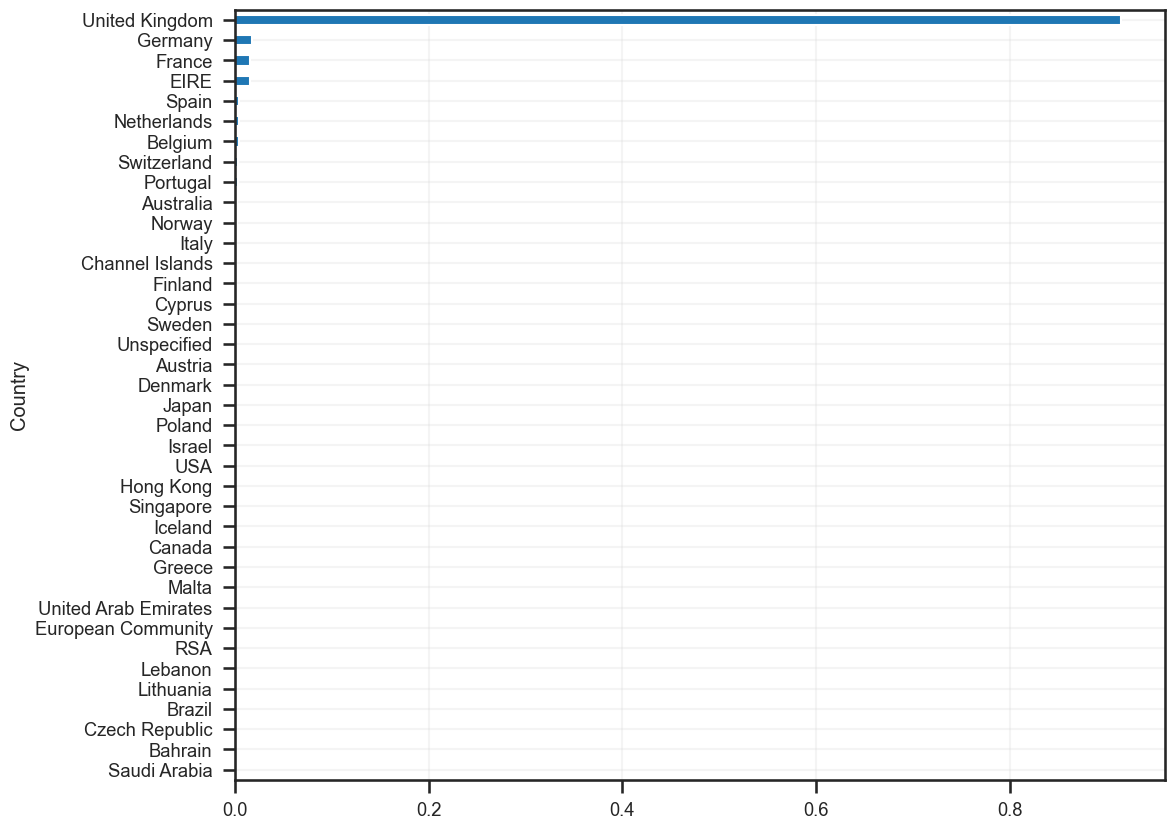

In [186]:
df['Country'].value_counts(normalize=True, ascending=True).plot.barh(figsize=(12,10))

In [187]:
df[['Quantity','UnitPrice']].describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [188]:
df.stb.freq(['Country'])

,Country,count,percent,cumulative_count,cumulative_percent
0,United Kingdom,495478,91.431956,495478,91.431956
1,Germany,9495,1.752139,504973,93.184095
2,France,8557,1.579047,513530,94.763143
3,EIRE,8196,1.512431,521726,96.275574
4,Spain,2533,0.467422,524259,96.742996
5,Netherlands,2371,0.437527,526630,97.180523
6,Belgium,2069,0.381798,528699,97.562321
7,Switzerland,2002,0.369435,530701,97.931756
8,Portugal,1519,0.280305,532220,98.212061
9,Australia,1259,0.232327,533479,98.444388


In [189]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [190]:
# Verificando valores duplicados
df.isna().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
StockCode           0
InvoiceNo           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [191]:
df.duplicated().sum()

np.int64(5268)

In [192]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Step 3 : Data Preparation

### 514. Data preparation
<h1>Tema central: Etapa de Preparação de Dados para Modelagem de Clusterização</h1><h2>Tópicos abordados</h2><h3>Tratamento de valores missing</h3><ul><li>Verificou valores missing com a biblioteca Sidetable</li><li>24-25% dos valores de cliente estavam missing</li><li>Não é possível clusterizar sem o ID do cliente</li><li>Decidiu excluir os valores missing de cliente</li></ul><h3>Formato das colunas</h3><ul><li>Converteu colunas como Cluster ID e Invoice Date para os tipos corretos</li><li>Fez análises exploratórias com boxplots para entender a distribuição dos dados</li></ul><h3>Dados que não fazem sentido</h3><ul><li>Identificou linhas com quantidade ou preço negativos</li><li>Decidiu excluir essas linhas pois não fazem sentido para a análise</li></ul><h3>Outliers</h3><ul><li>Identificou e removeu outliers extremos nas colunas de quantidade e preço</li><li>Fez transformações nos dados para reduzir a influência de outros outliers</li></ul><h3>Cálculo das métricas RFM</h3><ul><li>Calculou as métricas Recência, Frequência e Valor Médio para cada cliente</li><li>Fez transformações e padronizações nessas métricas para facilitar a modelagem</li></ul><h3>Próximos passos</h3><ul><li>Na próxima etapa, vai desenvolver e avaliar modelos de clusterização</li><li>Depois escolherá o melhor modelo e fará a interpretação dos clusters</li></ul><p>Espero que esse resumo em forma de mapa mental tenha capturado os principais tópicos e etapas abordados no vídeo! Avise se precisar de algum esclarecimento ou se deseja que eu adicione mais detalhes.</p>

## Data Cleaning

In [193]:
# Verificar missing
df.stb.missing()

,missing,total,percent
CustomerID,135080,541909,24.926694
Description,1454,541909,0.268311
StockCode,0,541909,0.000000
InvoiceNo,0,541909,0.000000
Quantity,0,541909,0.000000
InvoiceDate,0,541909,0.000000
UnitPrice,0,541909,0.000000
Country,0,541909,0.000000


In [194]:
# Excluindo valores faltantes
df = df.dropna(subset=['CustomerID'])

In [195]:
df.stb.missing()

,missing,total,percent
InvoiceNo,0,406829,0.0
StockCode,0,406829,0.0
Description,0,406829,0.0
Quantity,0,406829,0.0
InvoiceDate,0,406829,0.0
UnitPrice,0,406829,0.0
CustomerID,0,406829,0.0
Country,0,406829,0.0


In [196]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [197]:
# Tratamento da colunas
%timeit
pd.to_datetime(df.InvoiceDate)

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 406829, dtype: datetime64[ns]

In [198]:
%%timeit
pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')

102 ms ± 775 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [199]:
# Formato de data ajuste
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')

C:\Users\User\AppData\Local\Temp\ipykernel_22604\1872962239.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [200]:
# Convertendo categoria e inteiro
df['CustomerID'] = df['CustomerID'].astype(int)
df['Country'] = df['Country'].astype('category')

C:\Users\User\AppData\Local\Temp\ipykernel_22604\1103362761.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Temp\ipykernel_22604\1103362761.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [201]:
df = df.copy()

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 25.2+ MB


In [203]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [204]:
df.InvoiceDate.agg(['min','max'])

min   2010-12-01 08:26:00
max   2011-12-09 12:50:00
Name: InvoiceDate, dtype: datetime64[ns]

In [205]:
# igual o abaixo a 0 Le
below0 = df[['Quantity','UnitPrice']].le(0).any(axis=1)
df = df[~below0].copy()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


<Axes: >

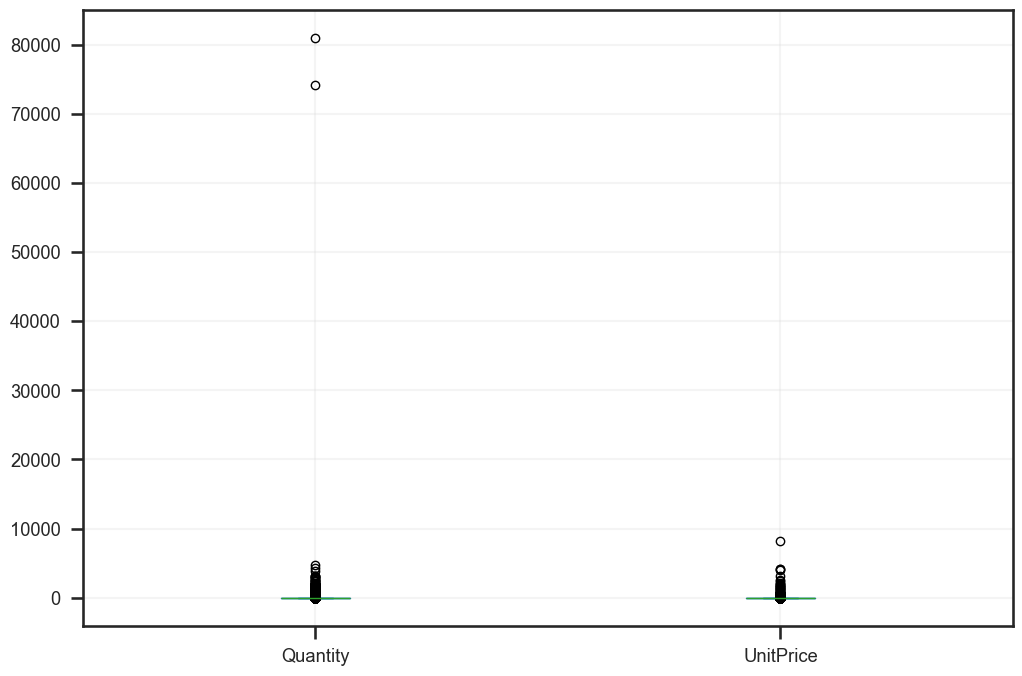

In [206]:
df[['Quantity','UnitPrice']].plot.box()

In [207]:
df.query('Quantity>10_000')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom


<Axes: >

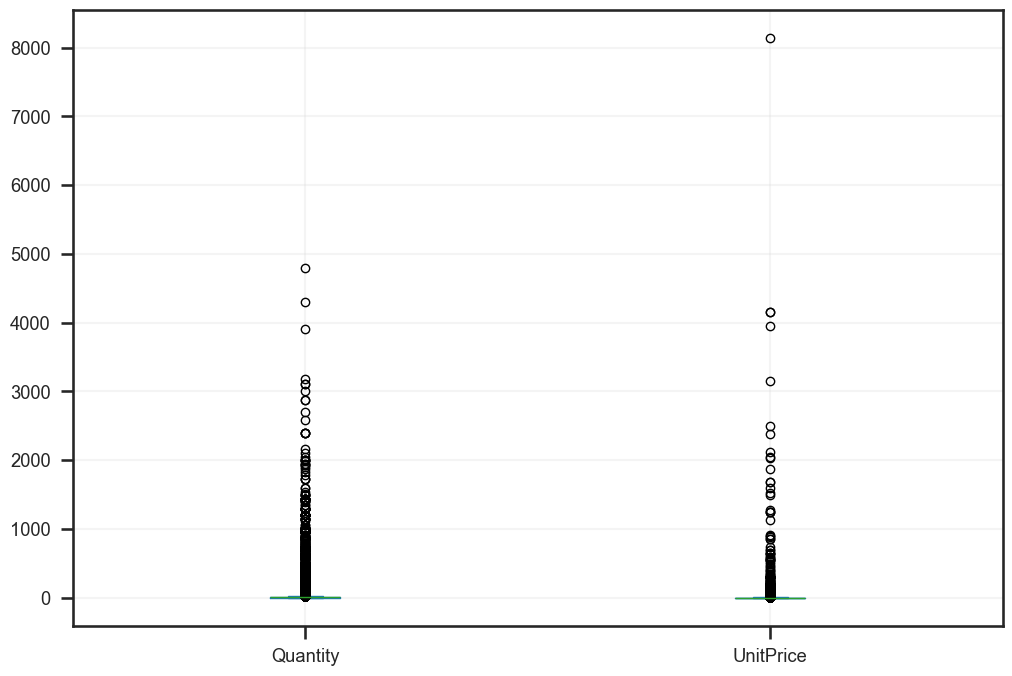

In [208]:
df.query('Quantity<10_000')[['Quantity','UnitPrice']].plot.box()

In [209]:
df.query('UnitPrice>8_000')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom


In [210]:
df = df.query('Quantity<10_000 & UnitPrice<8_000').copy()

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397881 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397881 non-null  object        
 1   StockCode    397881 non-null  object        
 2   Description  397881 non-null  object        
 3   Quantity     397881 non-null  int64         
 4   InvoiceDate  397881 non-null  datetime64[ns]
 5   UnitPrice    397881 non-null  float64       
 6   CustomerID   397881 non-null  int64         
 7   Country      397881 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 24.7+ MB


In [212]:
df['price_total'] = df.Quantity * df.UnitPrice
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,price_total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


RFM

In [213]:
pd.Timestamp.today()

Timestamp('2024-09-26 11:30:18.647137')

In [214]:
pd.Timestamp('2012-01-01')

Timestamp('2012-01-01 00:00:00')

In [215]:
df_rfm = (
  df.groupby('CustomerID')
  .agg(
      R = ('InvoiceDate', lambda x: (pd.Timestamp.today() - x.max()).days),
      F = ('InvoiceNo', 'nunique'),
      M = ('price_total', 'mean')
  )
)

df_rfm

,R,F,M
CustomerID,,,
12347,4676,7,23.681319
12348,4749,4,57.975484
12349,4693,1,24.076027
12350,4984,1,19.670588
12352,4710,8,29.482824
...,...,...,...
18280,4952,1,18.060000
18281,4855,1,11.545714
18282,4681,2,14.837500


In [216]:
df_rfm = (
  df.groupby('CustomerID')
  .agg(
      R = ('InvoiceDate', lambda x: (pd.Timestamp('2012-01-01') - x.max()).days),
      F = ('InvoiceNo', 'nunique'),
      M = ('price_total', 'mean')
  )
)

df_rfm

,R,F,M
CustomerID,,,
12347,24,7,23.681319
12348,97,4,57.975484
12349,40,1,24.076027
12350,332,1,19.670588
12352,58,8,29.482824
...,...,...,...
18280,299,1,18.060000
18281,202,1,11.545714
18282,29,2,14.837500


<Axes: >

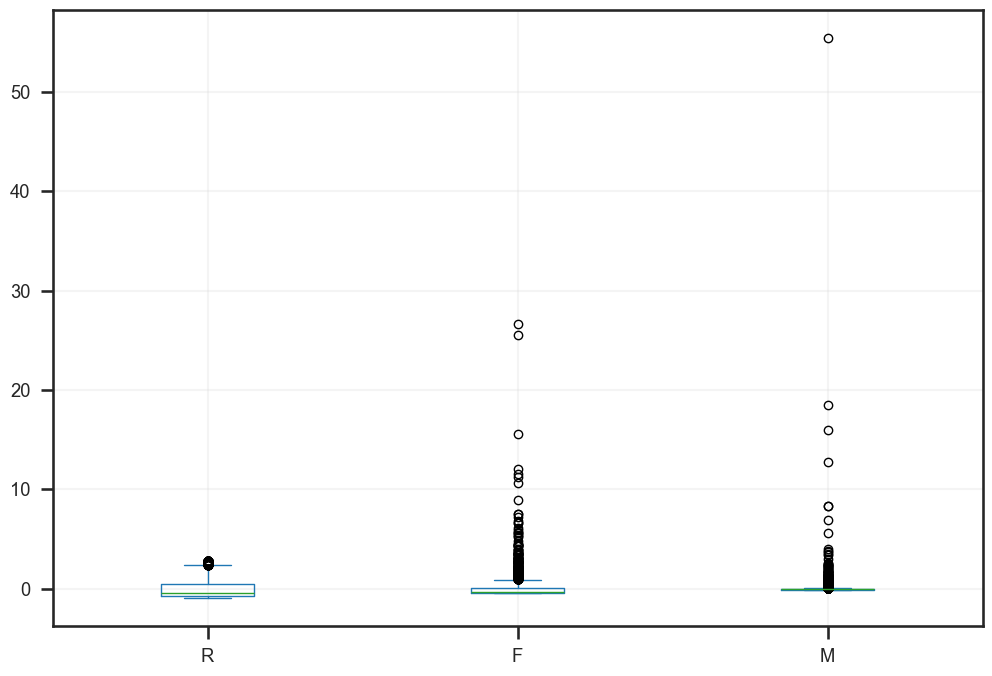

In [217]:
df_rfm.apply(scale).plot.box()

In [218]:
df_rfm.apply(scale).query('M>50')

,R,F,M
CustomerID,,,
15098,0.899878,-0.165317,55.434876


In [219]:
df.query('CustomerID==15098')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,price_total
222670,556442,22502,PICNIC BASKET WICKER SMALL,60,2011-06-10 15:22:00,4.95,15098,United Kingdom,297.0
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098,United Kingdom,38970.0
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2011-06-10 15:33:00,649.50,15098,United Kingdom,649.5


In [220]:
df_rfm = df_rfm.drop(15098)

<Axes: >

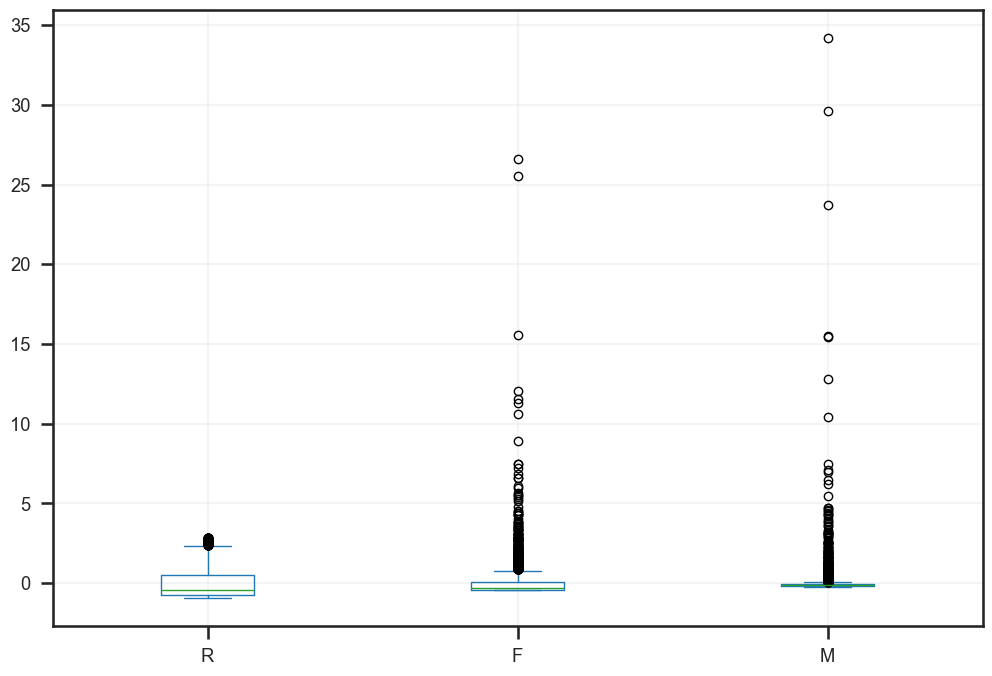

In [221]:
df_rfm.apply(scale).plot.box()

In [222]:
# Diminuindo os outliers com normalização
from sklearn.preprocessing import PowerTransformer

In [223]:
scaler = PowerTransformer()

In [224]:
df_rfm_scaled = pd.DataFrame(scaler.fit_transform(df_rfm), index=df_rfm.index, columns=df_rfm.columns)
df_rfm_scaled

,R,F,M
CustomerID,,,
12347,-1.563219,1.201866,0.407836
12348,0.323470,0.660670,1.329304
12349,-0.809134,-1.158070,0.426829
12350,1.568467,-1.158070,0.189376
12352,-0.307718,1.309671,0.653411
...,...,...,...
18280,1.475652,-1.158070,0.085562
18281,1.107356,-1.158070,-0.491003
18282,-1.275046,-0.195707,-0.161007


<Axes: >

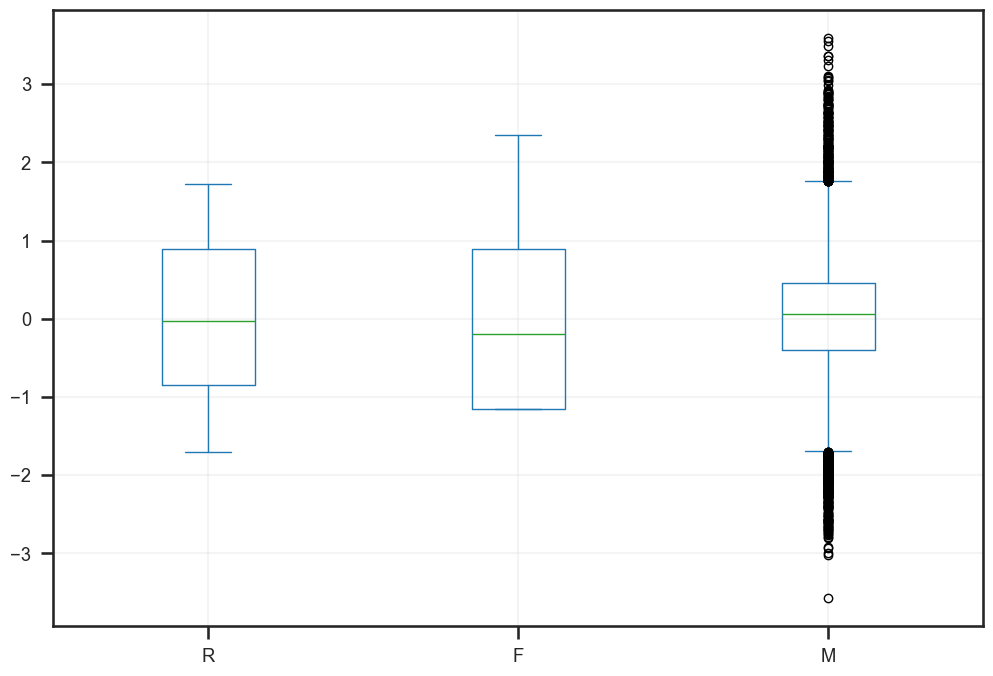

In [225]:
df_rfm_scaled.plot.box()

In [226]:
scaler.inverse_transform(df_rfm_scaled)

array([[24.        ,  7.        , 23.68131868],
       [97.        ,  4.        , 57.97548387],
       [40.        ,  1.        , 24.0760274 ],
       ...,
       [29.        ,  2.        , 14.8375    ],
       [25.        , 16.        ,  2.77100529],
       [64.        ,  3.        , 26.24685714]])

In [227]:
df_rfm.describe()

,R,F,M
count,4336.000000,4336.000000,4336.000000
mean,114.032288,4.272601,34.554185
std,99.968352,7.697927,129.202663
min,22.000000,1.000000,1.450000
25%,39.000000,1.000000,12.339095
50%,72.000000,2.000000,17.715999
75%,163.250000,5.000000,24.843993
max,395.000000,209.000000,4453.430000


### 515. Modeling
<p>TEMA CENTRAL: Análise de clusterização RFM para segmentação de clientes</p><p>TÓPICOS ABORDADOS:</p><ul><li><p>Preparação dos dados</p><ul><li>Análise exploratória<ul><li>Identificação de outliers</li></ul></li><li>Tratamento de outliers<ul><li>Técnica de clipping para limitar valores extremos</li></ul></li><li>Padronização dos dados</li></ul></li><li><p>Modelos de clusterização testados</p><ul><li>K-means<ul><li>Determinação do número de clusters pelo método do cotovelo</li><li>4 clusters selecionados</li></ul></li><li>Clusterização hierárquica<ul><li>Sem construção de dendrograma</li><li>4 clusters também sugeridos pelas métricas</li></ul></li><li>Gaussian Mixture<ul><li>7 clusters sugeridos, mas visualização muito confusa</li><li>Teste com 5 clusters, mas separação não muito clara</li></ul></li></ul></li><li><p>Comparação visual dos clusters</p><ul><li>K-means com melhor separação dos grupos</li><li>Será utilizado para próximas etapas</li></ul></li><li><p>Próximos passos</p><ul><li>Análise descritiva dos clusters do K-means</li><li>Definição de ações para cada grupo</li><li>Apresentação para stakeholders</li></ul></li></ul>

In [228]:
df_rfm_clip = df_rfm.apply(lambda x: x.clip(upper=x.quantile(.95)))
df_rfm_clip.describe()

,R,F,M
count,4336.000000,4336.000000,4336.000000
mean,112.248155,3.608164,23.634656
std,95.504576,3.358999,20.993635
min,22.000000,1.000000,1.450000
25%,39.000000,1.000000,12.339095
50%,72.000000,2.000000,17.715999
75%,163.250000,5.000000,24.843993
max,333.000000,13.000000,91.768421


In [229]:
df_rfm_clip_scaled = df_rfm_clip.apply(scale)

# Step 4-5: Modeling & Model evaluation

## K-Means

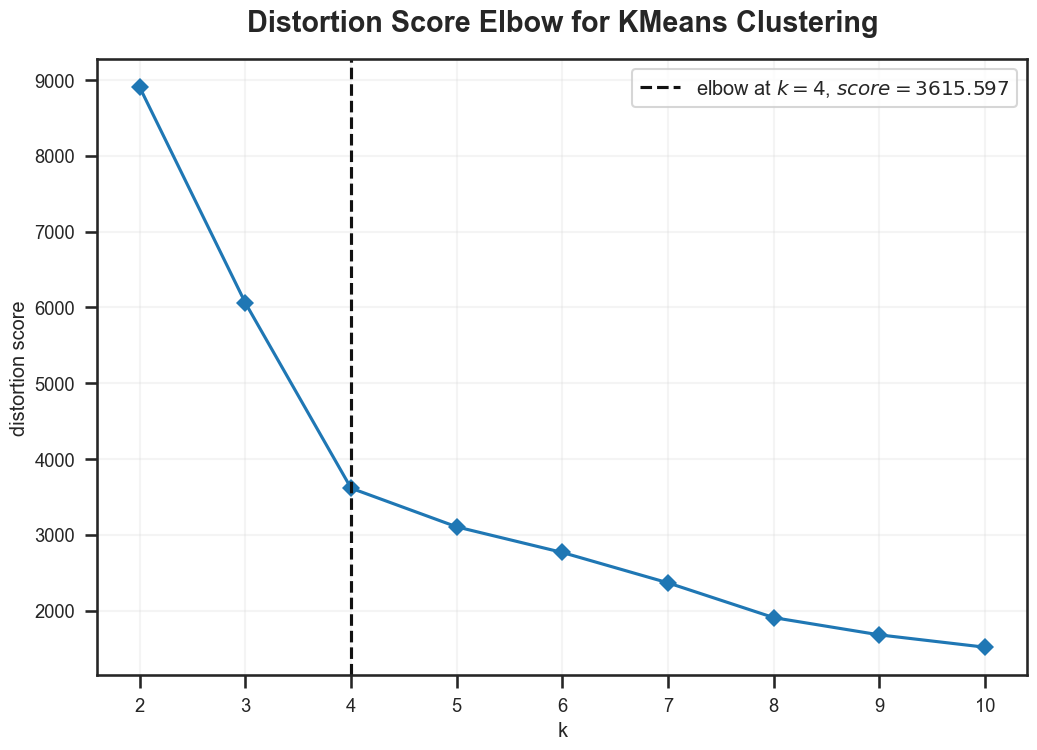

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10), timings=False)

In [230]:
kelbow_visualizer(KMeans(), df_rfm_clip_scaled, k=10, timings=False)

In [231]:
# Create list of dictionaries

cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []
X = df_rfm_clip_scaled.copy()

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(X)
  cluster_results_dict = {'k': k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,9608.319042,0.481575,1.042550,1533.485432
3,6380.827963,0.395222,0.918987,2250.147145
4,3615.611638,0.479553,0.704462,3751.144746
5,3104.989759,0.386168,0.855067,3453.313624
6,2542.521220,0.397775,0.851237,3564.616053
7,2240.392476,0.401925,0.849436,3467.623360
8,1907.087195,0.383633,0.862005,3598.989252
9,1668.788329,0.394132,0.800834,3675.183274
10,1516.652722,0.351693,0.887890,3641.928356


In [232]:
kmeans = KMeans(4)
kmeans_labels = kmeans.fit_predict(df_rfm_clip_scaled)

In [233]:
px.scatter_3d(df_rfm_clip, x='R', y='F', z='M', color=kmeans_labels.astype(str), template='plotly_dark')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'color=3<br>R=%{x}<br>F=%{y}<br>M=%{z}<extra></extra>',
              'legendgroup': '3',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '3',
              'scene': 'scene',
              'showlegend': True,
              'type': 'scatter3d',
              'x': array([24, 58, 25, ..., 29, 61, 25]),
              'y': array([ 7,  8, 10, ...,  7,  8, 13]),
              'z': array([23.68131868, 29.48282353, 19.6474812 , ..., 14.66891429, 19.81042373,
                           2.77100529])},
             {'hovertemplate': 'color=2<br>R=%{x}<br>F=%{y}<br>M=%{z}<extra></extra>',
              'legendgroup': '2',
              'marker': {'color': '#EF553B', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '2',
              'scene': 'scene',
              'showlegend': True,
              'type': 'scatter3d',
              'x': array([ 97,  23,  71, ..., 109,  46,  24]),
              'y': array([4, 2, 1, ..., 1, 3, 3]),
              'z': array([57.97548387, 61.47684211, 85.54      , ..., 91.76842105, 55.68095238,
                          68.        ])},
             {'hovertemplate': 'color=0<br>R=%{x}<br>F=%{y}<br>M=%{z}<extra></extra>',
              'legendgroup': '0',
              'marker': {'color': '#00cc96', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '0',
              'scene': 'scene',
              'showlegend': True,
              'type': 'scatter3d',
              'x': array([40, 44, 55, ..., 95, 29, 64]),
              'y': array([1, 3, 1, ..., 1, 2, 3]),
              'z': array([24.0760274 , 47.65135593, 47.38679389, ..., 19.32222222, 14.8375    ,
                          26.24685714])},
             {'hovertemplate': 'color=1<br>R=%{x}<br>F=%{y}<br>M=%{z}<extra></extra>',
              'legendgroup': '1',
              'marker': {'color': '#ab63fa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '1',
              'scene': 'scene',
              'showlegend': True,
              'type': 'scatter3d',
              'x': array([332, 226, 254, ..., 333, 299, 202]),
              'y': array([1, 1, 1, ..., 1, 1, 1]),
              'z': array([19.67058824, 22.25      , 18.61034483, ..., 24.08571429, 18.06      ,
                          11.54571429])}],
    'layout': {'legend': {'title': {'text': 'color'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'scene': {'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
                         'xaxis': {'title': {'text': 'R'}},
                         'yaxis': {'title': {'text': 'F'}},
                         'zaxis': {'title': {'text': 'M'}}},
               'template': '...'}
})

## Hierarchical Clustering

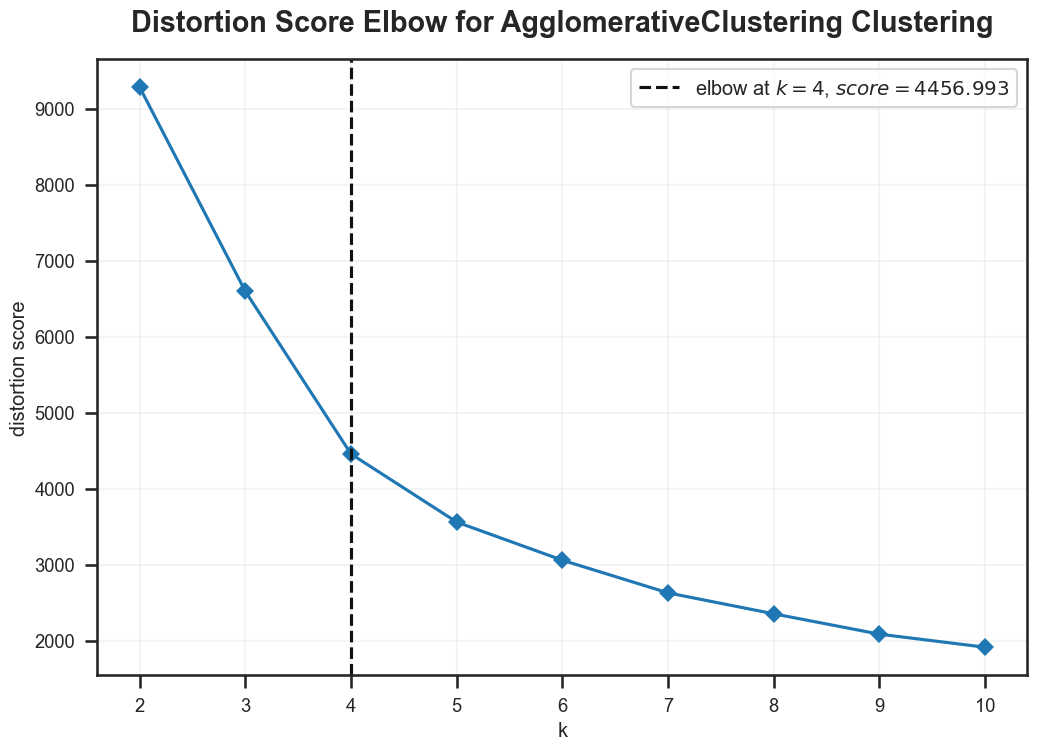

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=AgglomerativeClustering(n_clusters=10),
                 timings=False)

In [234]:
kelbow_visualizer(AgglomerativeClustering(), df_rfm_clip_scaled, k=10, timings=False)

In [235]:
# Create list of dictionaries

cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []
X = df_rfm_clip_scaled.copy()

for k in range(2,11):
  model = AgglomerativeClustering(n_clusters=k)
  labels = model.fit_predict(X)
  cluster_results_dict = {'k': k}
  # cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,
2,0.361292,1.331666,1737.623791
3,0.398928,0.869855,2104.783905
4,0.431886,0.761966,2770.399918
5,0.342136,0.897329,2872.239315
6,0.348298,0.791909,2816.854970
7,0.322680,0.844326,2848.491623
8,0.287643,0.967432,2799.001327
9,0.286883,0.976982,2832.797336
10,0.298923,0.953087,2786.657350


In [236]:
hclust = AgglomerativeClustering(n_clusters=4)
hclust_labels = hclust.fit_predict(df_rfm_clip_scaled)

In [237]:
px.scatter_3d(df_rfm_clip, x='R', y='F', z='M', color=hclust_labels.astype(str), template='plotly_dark')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'color=0<br>R=%{x}<br>F=%{y}<br>M=%{z}<extra></extra>',
              'legendgroup': '0',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '0',
              'scene': 'scene',
              'showlegend': True,
              'type': 'scatter3d',
              'x': array([24, 40, 58, ..., 95, 29, 64]),
              'y': array([7, 1, 8, ..., 1, 2, 3]),
              'z': array([23.68131868, 24.0760274 , 29.48282353, ..., 19.32222222, 14.8375    ,
                          26.24685714])},
             {'hovertemplate': 'color=2<br>R=%{x}<br>F=%{y}<br>M=%{z}<extra></extra>',
              'legendgroup': '2',
              'marker': {'color': '#EF553B', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '2',
              'scene': 'scene',
              'showlegend': True,
              'type': 'scatter3d',
              'x': array([ 97,  44,  55, ..., 109,  46,  24]),
              'y': array([4, 3, 1, ..., 1, 3, 3]),
              'z': array([57.97548387, 47.65135593, 47.38679389, ..., 91.76842105, 55.68095238,
                          68.        ])},
             {'hovertemplate': 'color=3<br>R=%{x}<br>F=%{y}<br>M=%{z}<extra></extra>',
              'legendgroup': '3',
              'marker': {'color': '#00cc96', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '3',
              'scene': 'scene',
              'showlegend': True,
              'type': 'scatter3d',
              'x': array([332, 226, 254, ..., 333, 299, 202]),
              'y': array([1, 1, 1, ..., 1, 1, 1]),
              'z': array([19.67058824, 22.25      , 18.61034483, ..., 24.08571429, 18.06      ,
                          11.54571429])},
             {'hovertemplate': 'color=1<br>R=%{x}<br>F=%{y}<br>M=%{z}<extra></extra>',
              'legendgroup': '1',
              'marker': {'color': '#ab63fa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '1',
              'scene': 'scene',
              'showlegend': True,
              'type': 'scatter3d',
              'x': array([41, 46, 57, ..., 66, 31, 25]),
              'y': array([12, 13, 13, ..., 11, 13, 13]),
              'z': array([19.35019231, 91.76842105, 27.60617021, ..., 21.6035124 , 19.93355769,
                           2.77100529])}],
    'layout': {'legend': {'title': {'text': 'color'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'scene': {'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
                         'xaxis': {'title': {'text': 'R'}},
                         'yaxis': {'title': {'text': 'F'}},
                         'zaxis': {'title': {'text': 'M'}}},
               'template': '...'}
})

## Gaussian Mixture

In [238]:
# Select best model by covariance type and K (Practical Statistics for Data Scientists)
results = []
k_range = range(1,9)
covariance_types = ['full', 'tied', 'diag', 'spherical']
X = df_rfm_clip_scaled.copy()

for n_components in k_range:
  for covariance_type in covariance_types:
    mclust = GaussianMixture(n_components=n_components, n_init=10, warm_start=True, covariance_type=covariance_type)
    mclust.fit(X)
    results.append({
      'bic': mclust.bic(X),
      'n_components': n_components,
      'covariance_type': covariance_type,
    })

results = pd.DataFrame(results)
results.sort_values('bic').head()

,bic,n_components,covariance_type
28,-2053.740874,8,full
30,-180.259101,8,diag
26,211.330942,7,diag
24,220.213439,7,full
20,9370.701944,6,full


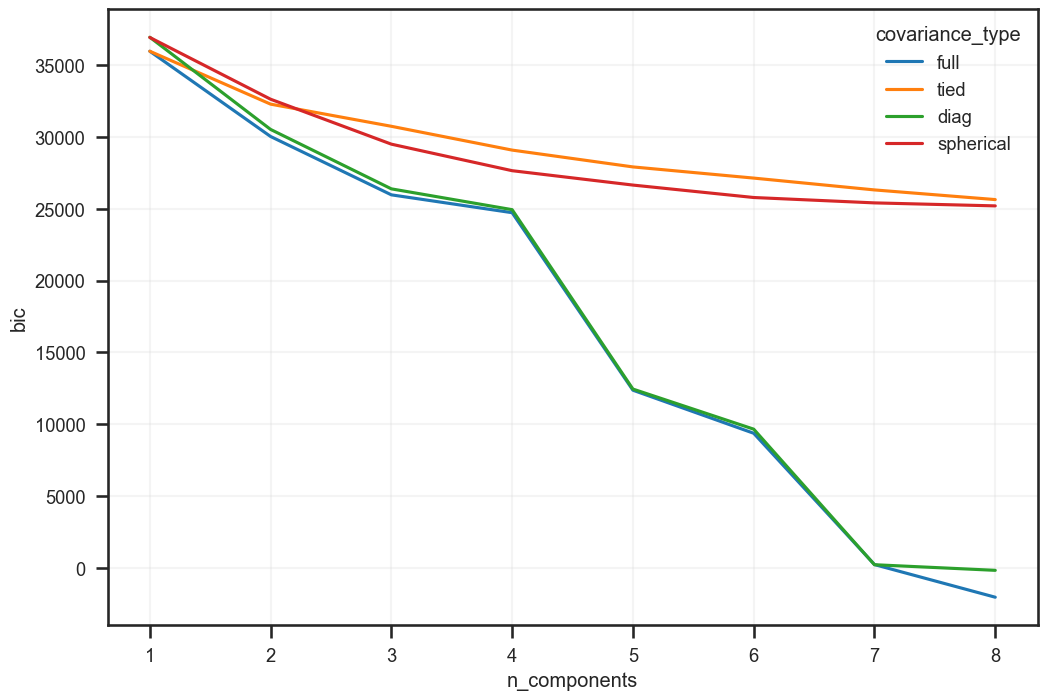

In [239]:
sns.lineplot(data=results, x='n_components', y='bic', hue='covariance_type');

In [240]:
mclust = GaussianMixture(n_components=5, covariance_type='full', n_init=10)
mclust_labels = mclust.fit_predict(df_rfm_clip_scaled)

In [241]:
px.scatter_3d(df_rfm_clip, x='R', y='F', z='M', color=mclust_labels.astype(str), template='plotly_dark')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'color=0<br>R=%{x}<br>F=%{y}<br>M=%{z}<extra></extra>',
              'legendgroup': '0',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '0',
              'scene': 'scene',
              'showlegend': True,
              'type': 'scatter3d',
              'x': array([24, 58, 25, ..., 61, 24, 25]),
              'y': array([ 7,  8, 10, ...,  8,  6, 13]),
              'z': array([23.68131868, 29.48282353, 19.6474812 , ..., 19.81042373, 18.54566265,
                           2.77100529])},
             {'hovertemplate': 'color=3<br>R=%{x}<br>F=%{y}<br>M=%{z}<extra></extra>',
              'legendgroup': '3',
              'marker': {'color': '#EF553B', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '3',
              'scene': 'scene',
              'showlegend': True,
              'type': 'scatter3d',
              'x': array([ 97,  44,  23, ...,  46, 194,  24]),
              'y': array([4, 3, 2, ..., 3, 6, 3]),
              'z': array([57.97548387, 47.65135593, 61.47684211, ..., 55.68095238, 19.72537313,
                          68.        ])},
             {'hovertemplate': 'color=4<br>R=%{x}<br>F=%{y}<br>M=%{z}<extra></extra>',
              'legendgroup': '4',
              'marker': {'color': '#00cc96', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '4',
              'scene': 'scene',
              'showlegend': True,
              'type': 'scatter3d',
              'x': array([ 40, 332, 226, ...,  95, 299, 202]),
              'y': array([1, 1, 1, ..., 1, 1, 1]),
              'z': array([24.0760274 , 19.67058824, 22.25      , ..., 19.32222222, 18.06      ,
                          11.54571429])},
             {'hovertemplate': 'color=2<br>R=%{x}<br>F=%{y}<br>M=%{z}<extra></extra>',
              'legendgroup': '2',
              'marker': {'color': '#ab63fa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '2',
              'scene': 'scene',
              'showlegend': True,
              'type': 'scatter3d',
              'x': array([79, 74, 29, ..., 60, 29, 64]),
              'y': array([4, 3, 4, ..., 2, 2, 3]),
              'z': array([25.6958871 , 20.63612403, 15.44823529, ..., 25.74090909, 14.8375    ,
                          26.24685714])},
             {'hovertemplate': 'color=1<br>R=%{x}<br>F=%{y}<br>M=%{z}<extra></extra>',
              'legendgroup': '1',
              'marker': {'color': '#FFA15A', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '1',
              'scene': 'scene',
              'showlegend': True,
              'type': 'scatter3d',
              'x': array([131, 313, 333, ..., 233, 144,  94]),
              'y': array([2, 2, 2, ..., 2, 2, 2]),
              'z': array([24.        , 29.15363636, 21.14441558, ..., 31.52761905, 17.10680851,
                          17.42413043])}],
    'layout': {'legend': {'title': {'text': 'color'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'scene': {'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
                         'xaxis': {'title': {'text': 'R'}},
                         'yaxis': {'title': {'text': 'F'}},
                         'zaxis': {'title': {'text': 'M'}}},
               'template': '...'}
})

### 516 Conclusão do módulo
<h1>Tema central: Análise de clusters de clientes de e-commerce</h1><h2>Etapas</h2><ul><li>Definição do modelo de clusterização</li><li>Geração dos clusters</li><li>Atribuição de cluster para cada cliente</li><li>Análise dos centróides de cada cluster<ul><li>Cluster 1<ul><li>Ticket médio muito alto</li><li>Frequência de compra não muito alta</li><li>Recência alta</li></ul></li><li>Cluster 2<ul><li>Frequência muito alta</li><li>Recência baixa</li><li>Ticket médio não muito alto</li></ul></li><li>Cluster 3<ul><li>Recência muito alta</li><li>Frequência baixa</li><li>Ticket médio baixo (possivelmente clientes inativos/churn)</li></ul></li><li>Cluster 4<ul><li>Recência muito baixa (provavelmente novos clientes)</li><li>Frequência baixa</li><li>Ticket médio baixo</li></ul></li></ul></li><li>Análise da tabela com médias por cluster<ul><li>Confirmação das características de cada cluster</li></ul></li><li>Elaboração de relatório<ul><li>Nomeação dos clusters (ex: cliente VIP, cliente frequente, cliente inativo)</li><li>Recomendações de estratégias para cada cluster</li></ul></li></ul><h2>Próximos passos</h2><ul><li>Definição de estratégias específicas para cada cluster</li><li>Automatização da clusterização em pipeline</li><li>Atualização periódica dos clusters</li></ul><p>O resumo buscou trazer o tema central, que é a análise de clusters de clientes de e-commerce, e percorrer todas as etapas mencionadas, descrevendo as características de cada cluster e os próximos passos recomendados. Foi formatado com markdowns para facilitar a visualização.</p>

# Step 5: Interpretação dos clusters

In [242]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=df_rfm_clip_scaled.columns)

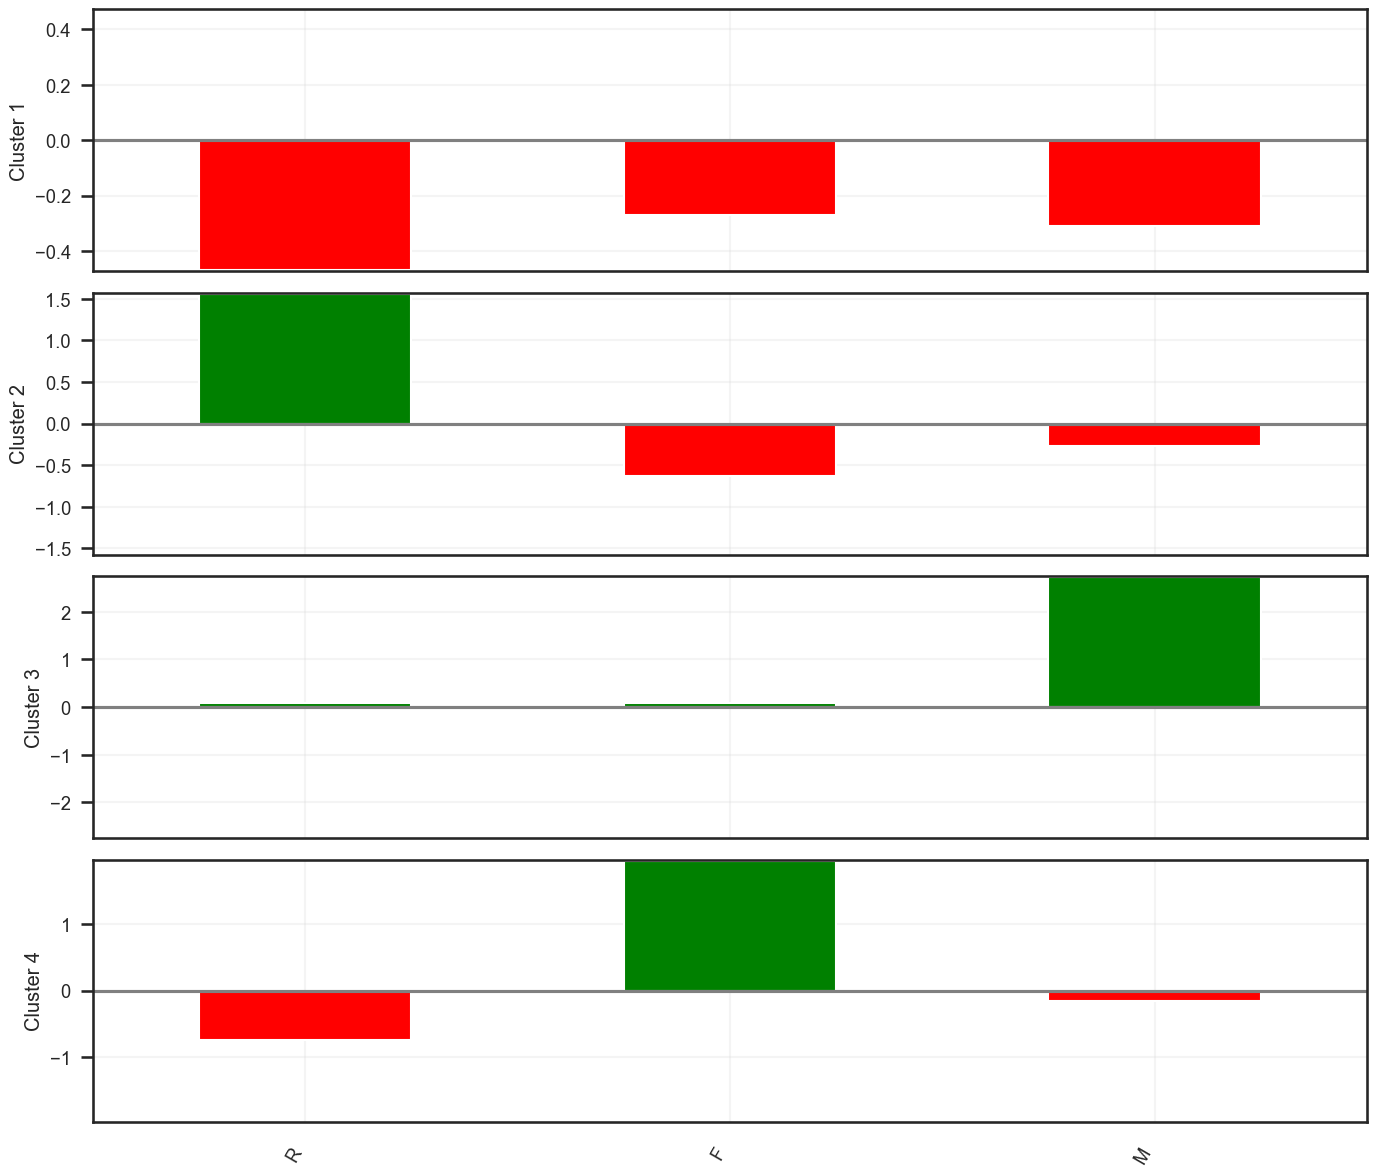

In [243]:
# Adaptado do livro "Practical Statistics for Data Scientists"
fig,axes = plt.subplots(nrows=4, figsize=(14,12), sharex=True)

for i,ax in enumerate(axes):
  center = centers.loc[i,:]
  maxPC = 1.01 * center.abs().max()
  colors = ['green' if l > 0 else 'red' for l in center]
  center.plot.bar(ax=ax, color=colors)
  ax.set_ylabel(f'Cluster {i+1}')
  ax.set_ylim(-maxPC, maxPC)
  ax.axhline(color='gray')
  ax.xaxis.set_ticks_position('none') 

plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

In [244]:
(
  df_rfm_clip.assign(cluster=kmeans_labels)
  .groupby('cluster')
  .mean()
  .transpose()
  .style.background_gradient(cmap='YlOrRd', axis=1)
)

cluster,0,1,2,3
R,67.523221,261.082051,121.057935,41.517018
F,2.703877,1.509744,3.876574,10.191248
M,17.120301,18.104189,80.714098,20.426973
